In [6]:
import pandas as pd
df=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/3023/American_USCS_cancers.txt',sep='\t')
df.head()

,Notes,Cancer Sites,Cancer Sites Code,Sex,Sex Code,Age Groups,Age Groups Code,Count
0,NaN,All Invasive Cancer Sites Combined,0,Female,F,< 1 year,1,9316.0
1,NaN,All Invasive Cancer Sites Combined,0,Female,F,1-4 years,1-4,30486.0
2,NaN,All Invasive Cancer Sites Combined,0,Female,F,5-9 years,5-9,21348.0
3,NaN,All Invasive Cancer Sites Combined,0,Female,F,10-14 years,10-14,25839.0
4,NaN,All Invasive Cancer Sites Combined,0,Female,F,15-19 years,15-19,42078.0


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['legend.frameon']=False
plt.rcParams['axes.spines.right']=False
plt.rcParams['axes.spines.top']=False

In [8]:
import re 
import numpy as np

df=df.loc[~pd.isna(df['Count'])]
df=df[['Cancer Sites','Sex','Age Groups Code','Count']]

def get_avg(x):
    min_val,max_val=re.findall('(\d+)[+-]?(\d+)?',x)[0]
    if max_val.isdigit():
        pass
    else:
        max_val=min_val
    return np.mean([float(min_val),float(max_val)])

df['Age Groups Code']=df['Age Groups Code'].apply(lambda x:get_avg(x))
leading_cancer_sites = ['Digestive System',
                        'Male Genital System',
                        'Urinary System',
                        'All Invasive Cancer Sites Combined',
                        'Male and Female Breast',
                        'Male and Female Breast, In Situ',
                        'Male Genital System'
                        'Colon and Rectum',
                        'Lymphomas',
                        'Non-Hodgkin Lymphoma',
                        'Hodgkin Lymphoma',
                        'Colon and Rectum',
                        'Female Genital System',
                        'Brain and Other Nervous System',
                        'Endocrine System',
                        'Leukemias',
                        'Skin excluding Basal and Squamous',
                        'Oral Cavity and Pharynx',
                        'Respiratory System']
for cancer_site in leading_cancer_sites:
    df=df.loc[df['Cancer Sites']!=cancer_site]
df.head()

,Cancer Sites,Sex,Age Groups Code,Count
76,Lip,Female,22.0,17.0
77,Lip,Female,27.0,43.0
78,Lip,Female,32.0,82.0
79,Lip,Female,37.0,156.0
80,Lip,Female,42.0,277.0


### Male top 10

In [10]:
data=df.loc[df['Sex']=='Male']
male_10=data.groupby(['Cancer Sites'])['Count'].sum().sort_values(ascending=False).index[:10]
data=data.pivot_table(values='Count',index='Age Groups Code',aggfunc='mean',columns='Cancer Sites')
data=data[male_10]
data.head()

Cancer Sites,Prostate,Lung and Bronchus,Colon excluding Rectum,"Urinary Bladder, invasive and in situ",Melanoma of the Skin,Kidney and Renal Pelvis,Miscellaneous,Rectum and Rectosigmoid Junction,NHL - Nodal,Pancreas
Age Groups Code,,,,,,,,,,
1.0,29.0,57.0,NaN,26.0,93.0,661.0,959.0,NaN,76.0,NaN
2.5,76.0,99.0,NaN,111.0,132.0,2968.0,1298.0,NaN,932.0,17.0
7.0,31.0,36.0,43.0,44.0,255.0,963.0,852.0,NaN,1808.0,21.0
12.0,22.0,95.0,277.0,51.0,609.0,285.0,821.0,NaN,2208.0,43.0
17.0,65.0,296.0,771.0,245.0,2012.0,376.0,1070.0,153.0,3171.0,89.0


Text(0.5, 1.0, 'Top 10 Cancers for Men varies with Age USA')

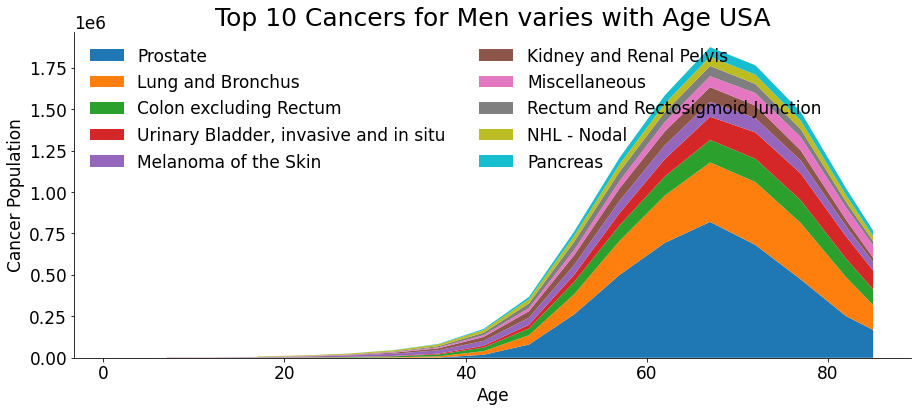

In [20]:
fontsize=17
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['axes.titlesize']=fontsize
plt.rcParams['legend.fontsize']=fontsize
plt.rcParams['figure.figsize']=(15,6)
plt.stackplot(data.index,data.T,labels=data.columns)
plt.xlabel('Age')
plt.ylabel('Cancer Population')
plt.legend(loc=2,ncol=2)
plt.title('Top 10 Cancers for Men varies with Age USA',fontsize=25)

Text(0.5, 1.0, 'Top 10 Cancers for Men varies with Age USA (no difference)')

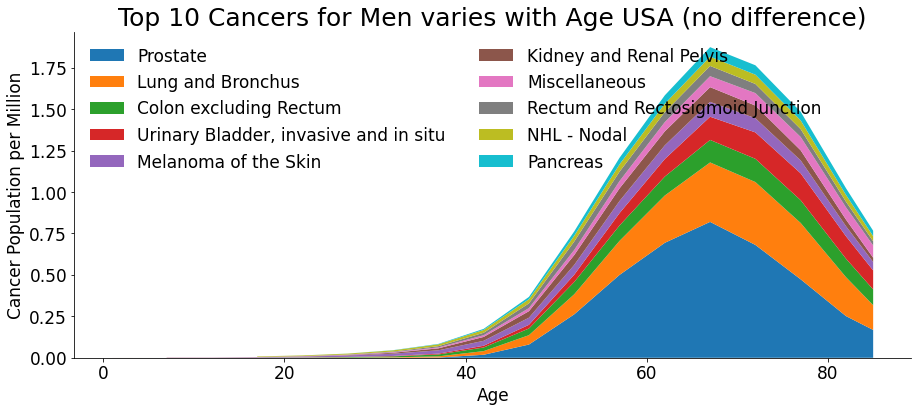

In [14]:
plt.rcParams['figure.figsize']=(15,6)
plt.stackplot(data.index,data.T/1000000,labels=data.columns)
plt.xlabel('Age')
plt.ylabel('Cancer Population per Million')
plt.legend(loc=2,ncol=2)
plt.title('Top 10 Cancers for Men varies with Age USA (no difference)',fontsize=25)

Text(0.5, 1.0, 'Top 10 Cancers for Men varies with Age USA')

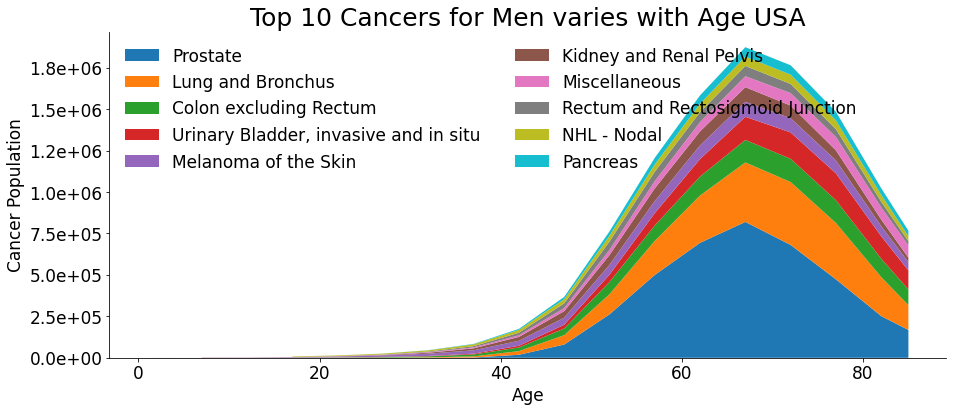

In [15]:
from matplotlib.ticker import FormatStrFormatter

plt.rcParams['figure.figsize']=(15,6)
plt.stackplot(data.index,data.T,labels=data.columns)
plt.xlabel('Age')
plt.ylabel('Cancer Population')
ax=plt.gca()

ax.yaxis.set_major_formatter(formatter=FormatStrFormatter('%0.1e'))

plt.legend(loc=2,ncol=2)
plt.title('Top 10 Cancers for Men varies with Age USA',fontsize=25)

Text(0.5, 1.0, 'Top 10 Cancers for Men varies with Age USA')

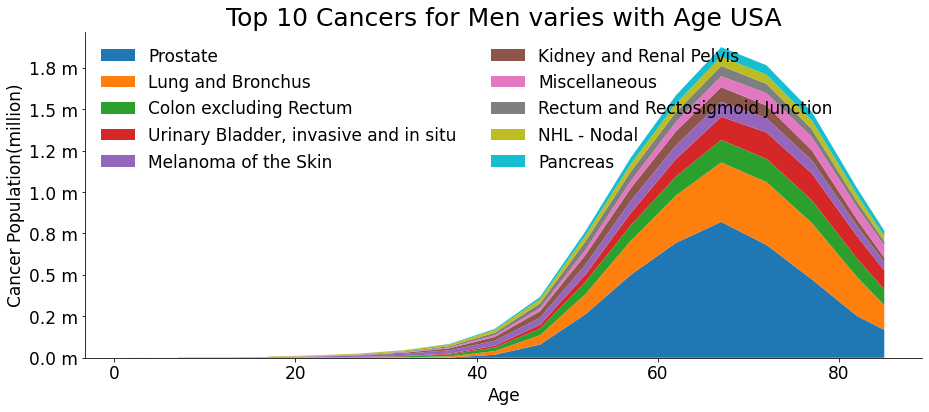

In [19]:
from matplotlib.ticker import FuncFormatter

plt.rcParams['figure.figsize']=(15,6)
plt.stackplot(data.index,data.T,labels=data.columns)
plt.xlabel('Age')
plt.ylabel('Cancer Population(million)')

def major_tick_format(num,pos):
    return '%.1f m'%(num/1000000)

ax=plt.gca()
formatter=FuncFormatter(major_tick_format)
ax.yaxis.set_major_formatter(formatter=formatter)
plt.legend(loc=2,ncol=2)
plt.title('Top 10 Cancers for Men varies with Age USA',fontsize=25)

### Female top 10

In [21]:
data=df.loc[df['Sex']=='Female']
female_10=data.groupby(['Cancer Sites'])['Count'].sum().sort_values(ascending=False).index[:10]
data=data.pivot_table(values='Count',index='Age Groups Code',aggfunc='sum',columns='Cancer Sites')
data=data[female_10]
data.head()

Cancer Sites,Female Breast,Lung and Bronchus,Colon excluding Rectum,"Female Breast, In Situ",Corpus Uteri,Thyroid,Miscellaneous,Melanoma of the Skin,Ovary,Pancreas
Age Groups Code,,,,,,,,,,
1.0,NaN,37.0,NaN,NaN,NaN,NaN,813.0,86.0,28.0,NaN
2.5,NaN,85.0,NaN,NaN,NaN,46.0,1072.0,149.0,82.0,NaN
7.0,NaN,42.0,56.0,NaN,NaN,321.0,649.0,296.0,440.0,26.0
12.0,49.0,96.0,366.0,NaN,16.0,1995.0,639.0,609.0,1420.0,97.0
17.0,320.0,259.0,934.0,37.0,110.0,7968.0,910.0,3185.0,2560.0,199.0


Text(0.5, 1.0, 'Top 10 Cancers for Women varies with Age USA')

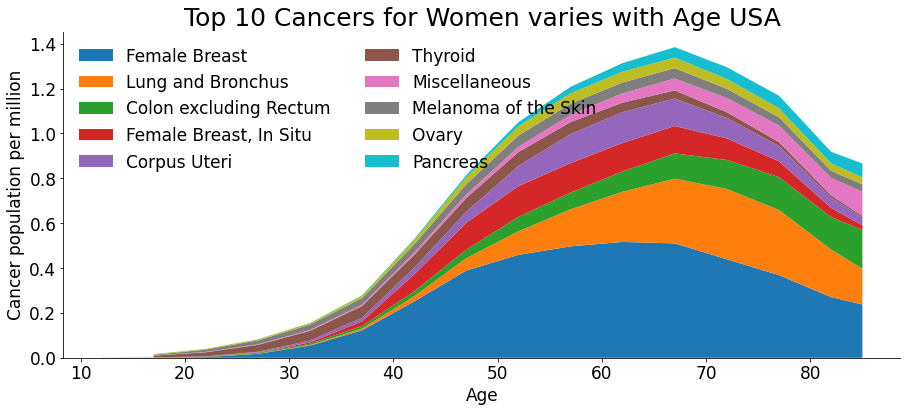

In [22]:
plt.stackplot(data.index, data.T/1000000, labels=data.columns)
plt.xlabel('Age')
plt.ylabel('Cancer population per million')
plt.legend(loc=2, ncol=2)
plt.title('Top 10 Cancers for Women varies with Age USA',fontsize=25)

### top 15 female cancer b4 40

Text(0.5, 1.0, 'Top 10 Cancers for Women varies with Age (<40) USA')

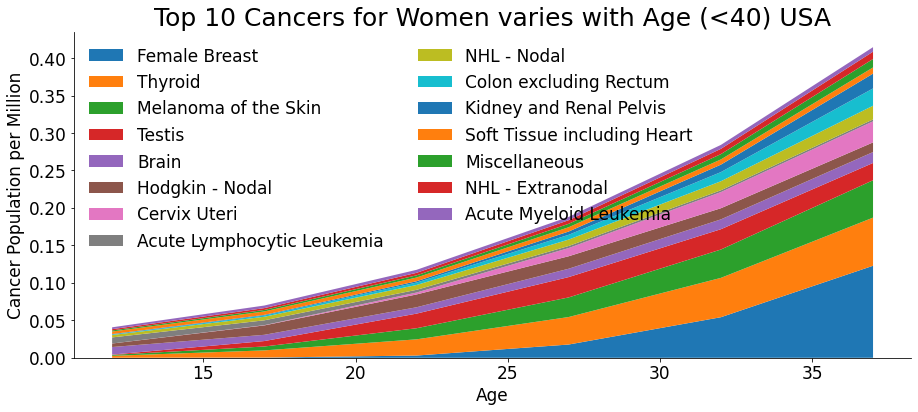

In [23]:
plt.rcParams['figure.figsize']=(15,6)
data=df.loc[df['Age Groups Code']<=40]
top_15=data.groupby(['Cancer Sites'])['Count'].sum().sort_values(ascending=False).index[:15]
data=data.pivot_table(values='Count',index='Age Groups Code',aggfunc='sum',columns='Cancer Sites')
data=data[top_15]
plt.stackplot(data.index,data.T/1000000,labels=data.columns)
plt.xlabel('Age')
plt.ylabel('Cancer Population per Million')
plt.legend(loc=2,ncol=2)
plt.title('Top 10 Cancers for Women varies with Age (<40) USA',fontsize=25)

### Male top 10 @ all ages

Text(0.5, 1.0, 'Uniformization Age Cancers of Men USA')

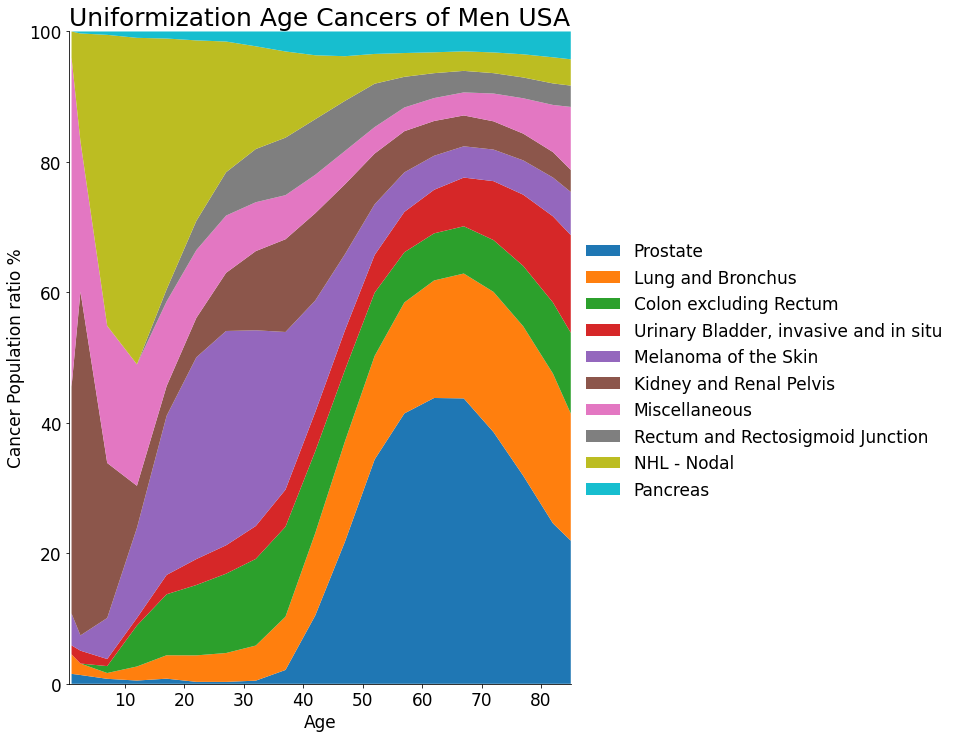

In [25]:
plt.rcParams['figure.figsize']=(9,12)
data=df.loc[df['Sex']=='Male']
male_10=data.groupby(['Cancer Sites'])['Count'].sum().sort_values(ascending=False).index[:10]
data=data.pivot_table(values='Count',index='Age Groups Code',aggfunc='sum',columns='Cancer Sites')
data=data[male_10]
data.fillna(value=0,inplace=True)

sums=data.sum(axis=1)
for col in data.columns:
    data[col]=data[col]/sums*100

plt.stackplot(data.index,data.T,labels=data.columns)
plt.xlabel('Age')
plt.ylabel('Cancer Population ratio %')
plt.xlim(.5,85)
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.0,.7),loc='upper left',ncol=1)
plt.title('Uniformization Age Cancers of Men USA',fontsize=25)

### Female top 10 @ all ages

Text(0.5, 1.0, 'Uniformization Age Cancers of Women USA')

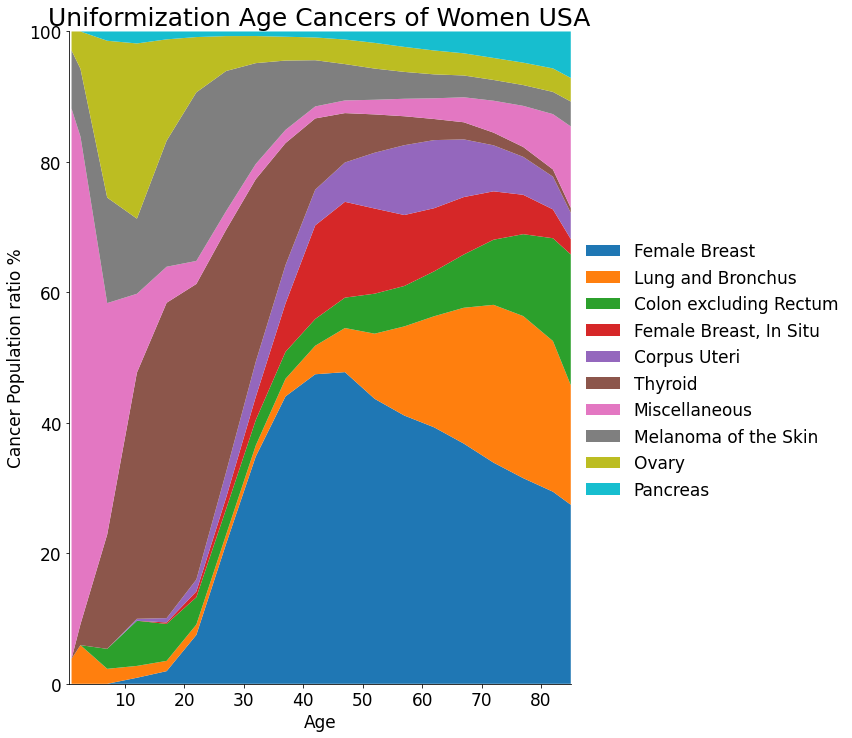

In [26]:
plt.rcParams['figure.figsize']=(9,12)
data=df.loc[df['Sex']=='Female']
female_10=data.groupby(['Cancer Sites'])['Count'].sum().sort_values(ascending=False).index[:10]
data=data.pivot_table(values='Count',index='Age Groups Code',aggfunc='sum',columns='Cancer Sites')
data=data[female_10]
data.fillna(value=0,inplace=True)

sums=data.sum(axis=1)
for col in data.columns:
    data[col]=data[col]/sums*100

plt.stackplot(data.index,data.T,labels=data.columns)
plt.xlabel('Age')
plt.ylabel('Cancer Population ratio %')
plt.xlim(.5,85)
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.0,.7),loc='upper left',ncol=1)
plt.title('Uniformization Age Cancers of Women USA',fontsize=25)

### top 10 relative

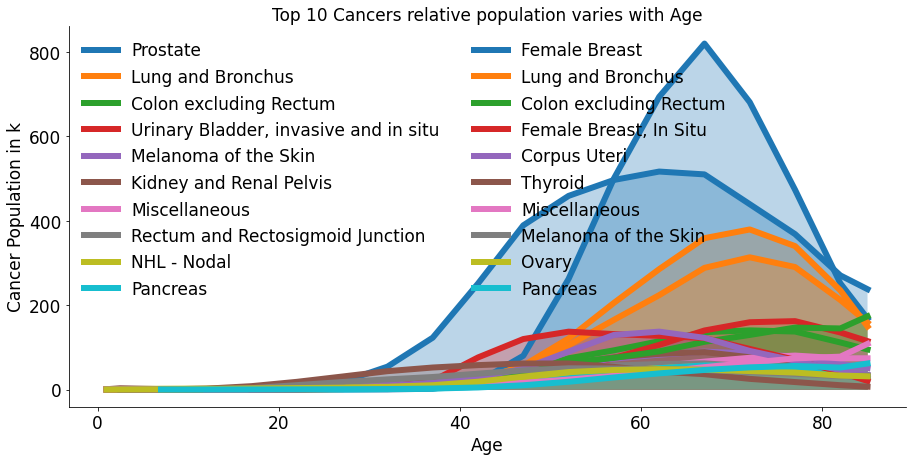

In [28]:
plt.rcParams['figure.figsize']=(15,7)
for sex in ['Male','Female']:
    data=df.loc[df['Sex']==sex]
    male_10=data.groupby(['Cancer Sites'])['Count'].sum().sort_values(ascending=False).index[:10]
    data=data.pivot_table(values='Count',index='Age Groups Code',aggfunc='sum',columns='Cancer Sites')
    data=data[male_10]
    for col in male_10:
        y=data[col]/1000
        plt.fill_between(data.index,y,alpha=.3)
        plt.plot(data.index,y,lw=6,label=col)
    plt.xlabel('Age')
    plt.ylabel('Cancer Population in k')
    plt.legend(loc=2,ncol=2)
    plt.title('Top 10 Cancers relative population varies with Age')

### cancer population varies by sex/age

Text(0.5, 1.0, 'Cancer Population varies by Gender and Age')

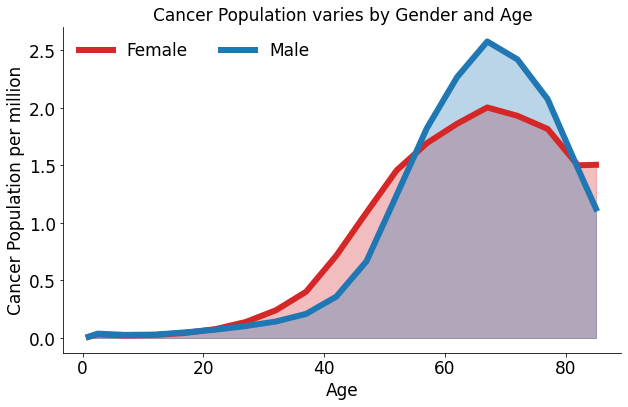

In [29]:
plt.rcParams['figure.figsize']=(10,6)
data=df
data=data.pivot_table(values='Count',index='Age Groups Code',aggfunc='sum',columns='Sex')
colors={'Male':'tab:blue','Female':'tab:red'}
for col in data.columns:
    color=colors[col]
    plt.fill_between(data.index,data[col]/1000000,alpha=.3,color=color)
    plt.plot(data.index,data[col]/1000000,lw=6,label=col,color=color)
plt.xlabel('Age')
plt.ylabel('Cancer Population per million')
plt.legend(loc=2,ncol=3)
plt.title('Cancer Population varies by Gender and Age')

### Top 20 cancer distribution varies by gender

In [30]:
fontsize=14
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['axes.titlesize']=fontsize
plt.rcParams['legend.fontsize']=fontsize
rows,cols=4,5
top_20=df.groupby(['Cancer Sites'])['Count'].sum().sort_values(ascending=False).index[:20]
top_20

Index(['Female Breast', 'Lung and Bronchus', 'Prostate',
       'Colon excluding Rectum', 'Urinary Bladder, invasive and in situ',
       'Melanoma of the Skin', 'Miscellaneous', 'Female Breast, In Situ',
       'Kidney and Renal Pelvis', 'Corpus Uteri', 'NHL - Nodal',
       'Rectum and Rectosigmoid Junction', 'Pancreas', 'Thyroid', 'Rectum',
       'Sigmoid Colon', 'Liver and Intrahepatic Bile Duct', 'Cecum', 'Stomach',
       'Ovary'],
      dtype='object', name='Cancer Sites')

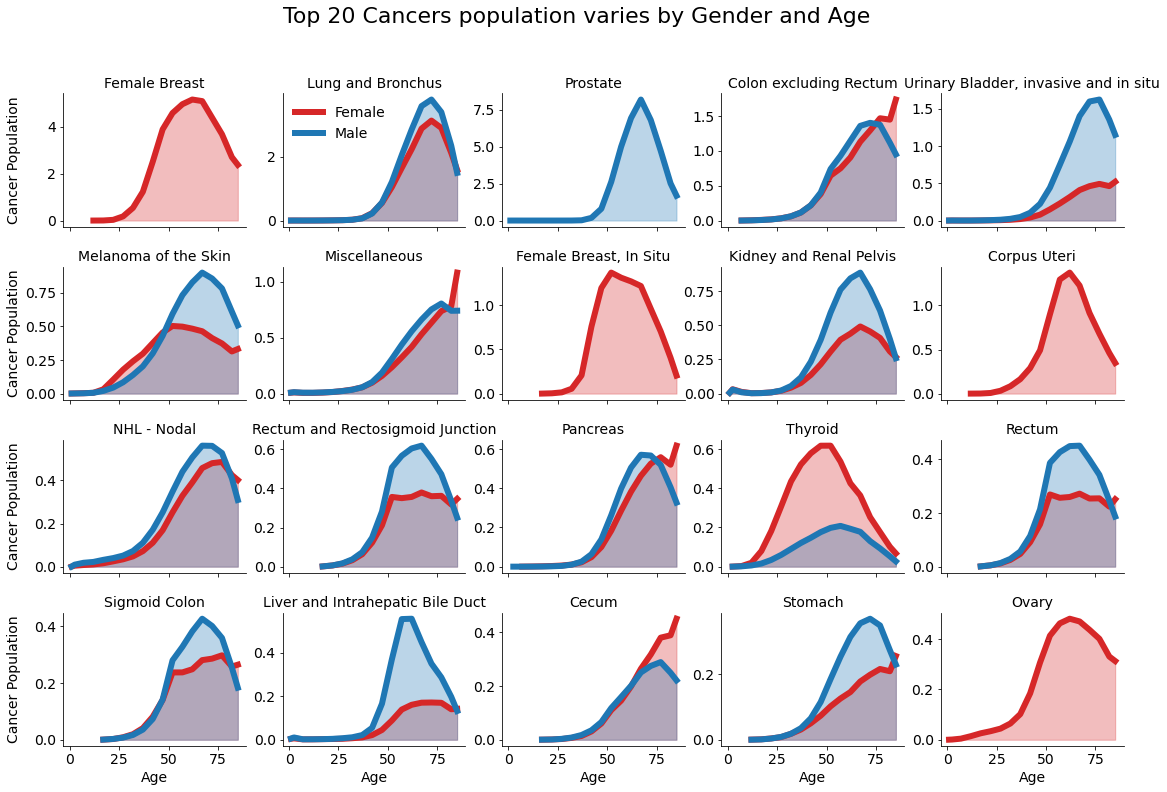

In [32]:
fig,axs=plt.subplots(rows,cols,sharex=True,figsize=(3.8*cols,3.0*rows))
axs=axs.ravel()
for i,cancer in enumerate(top_20):
    ax=axs[i]
    data=df.loc[df['Cancer Sites']==cancer]
    data=data.pivot_table(values='Count',index='Age Groups Code',aggfunc='sum',columns='Sex')
    data=data/100000
    colors={'Male':'tab:blue','Female':'tab:red'}
    for col in data.columns:
        color=colors[col]
        ax.fill_between(data.index,data[col],alpha=.3,color=color)
        ax.plot(data.index,data[col],lw=6,label=col,color=color)
        ax.set_title(cancer)
        if i==1:
            ax.legend()
        if i>=(rows-1)*cols:
            ax.set_xlabel('Age')
        if i%cols==0:
            ax.set_ylabel('Cancer Population')
fig.suptitle('Top %d Cancers population varies by Gender and Age'%(rows*cols),va='top',size=22)
fig.align_ylabels()
plt.subplots_adjust(wspace=.2,hspace=.3)

### Top 20 cancer population under Age 20

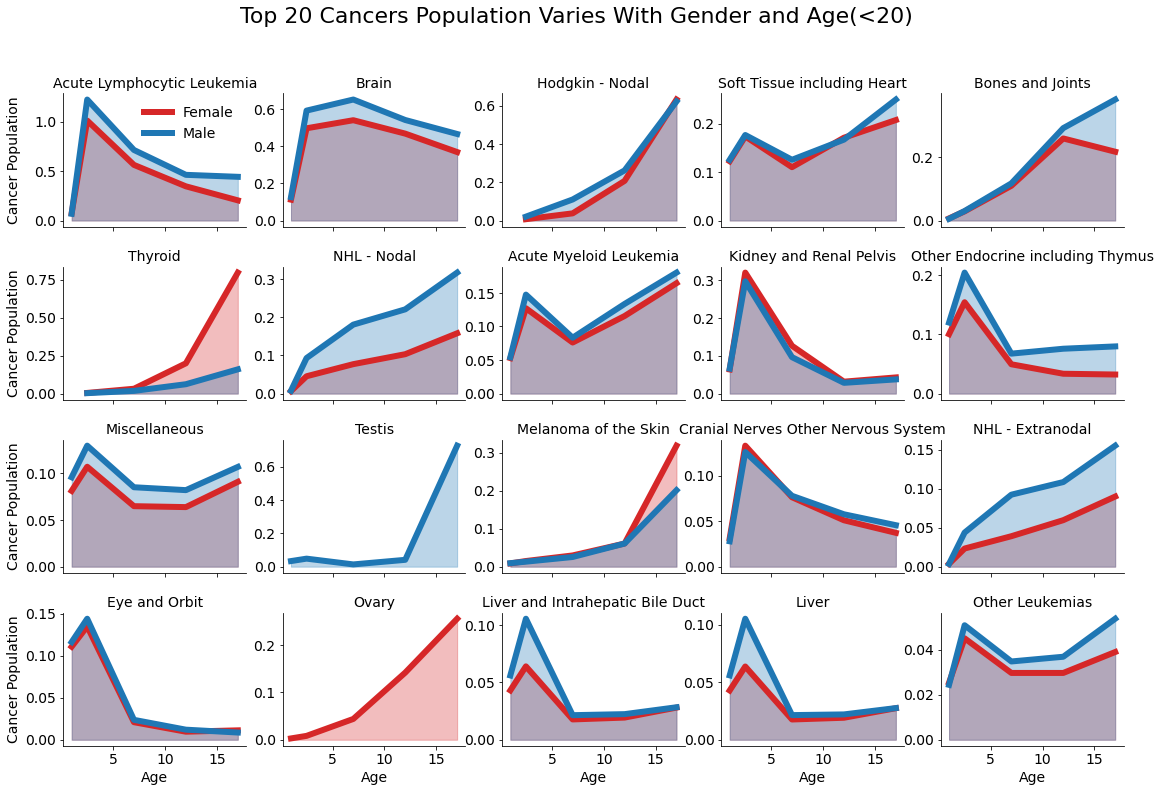

In [35]:
rows,cols=4,5
limit_age=20
top_20=df.loc[df['Age Groups Code']<=limit_age].groupby(['Cancer Sites'])['Count'].sum().sort_values(ascending=False).index[:20]
fig,axs=plt.subplots(rows,cols,sharex=True,figsize=(3.8*cols,3*rows))
axs=axs.ravel()
for i,cancer in enumerate(top_20):
    ax=axs[i]
    data=df.loc[df['Age Groups Code']<=limit_age]
    data=data.loc[data['Cancer Sites']==cancer]
    data=data.pivot_table(values='Count',index='Age Groups Code',aggfunc='sum',columns='Sex')
    data/=10000
    colors={'Male':'tab:blue','Female':'tab:red'}
    for col in data.columns:
        color=colors[col]
        ax.fill_between(data.index,data[col],alpha=.3,color=color)
        ax.plot(data.index,data[col],lw=6,label=col,color=color)
        ax.set_title(cancer)
        if i==0:
            ax.legend()
        if i>=(rows-1)*cols:
            ax.set_xlabel('Age')
        if i%cols==0:
            ax.set_ylabel('Cancer Population')
fig.suptitle('Top %d Cancers Population Varies With Gender and Age(<%d)' % (rows*cols, limit_age), va='top', size=22)
fig.align_ylabels()
fig.subplots_adjust(wspace=.2,hspace=.3)